<a href="https://colab.research.google.com/github/AjaharDaroga/EDA_CAPSTONE_PROJECT/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROBLEM STATEMENT:-**

<b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

<b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

<b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# important libraries
import pandas as pd
import numpy as np
import seaborn as sn              #visulazation library
import matplotlib.pyplot as plt   #visulazation library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load the dataset
df=pd.read_csv('/content/drive/MyDrive/CAPSTONE_PROJECTS/EDA_PROJECT_HOTEL_BOOKING_ANALYSIS/Hotel_Bookings.csv')

In [4]:
# view the data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# shape of dataset (i.e row & col)
df.shape

(119390, 32)

In [6]:
# info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
#check the decoration (features)
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
# missing data
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# droping feature/col which is more then 15% of data is missing
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
company,112593,0.943069
agent,16340,0.136862
country,488,0.004087
children,4,0.000034
reserved_room_type,0,0.000000
assigned_room_type,0,0.000000
booking_changes,0,0.000000
deposit_type,0,0.000000
hotel,0,0.000000
previous_cancellations,0,0.000000


In [23]:
df= df.drop(['company'], axis=1)
df.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,0,Transient,105.50,0,0,Canceled,2015-04-22


In [ ]:
df.shape

(119390, 31)

In [57]:
# Filling the Null Values
df["children"] = df["children"].fillna('mode')
df["country"] = df["country"].fillna('mode')
df["agent"] = df["agent"].fillna('mean') 

In [58]:
#final checking data missing values
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [59]:
# discriptive analysis
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000
mean,0.370411,104.011994,2016.156555,27.165292,15.798164,0.927606,2.500314,1.856402,0.007949,0.031912,0.087119,0.137098,0.221118,2.321169,101.786744,0.062518,0.571368
std,0.482917,106.863358,0.707479,13.605134,8.780826,0.998614,1.908289,0.579263,0.097437,0.175768,0.844340,1.497443,0.652304,17.594793,48.153554,0.245292,0.792800
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.560000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


In [60]:
# hotel booking propotion in resort hotel & city hotel
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

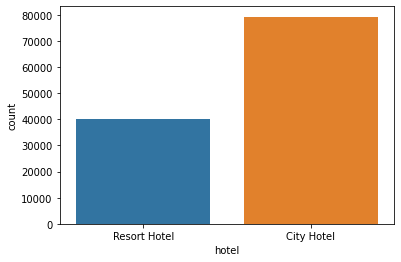

In [61]:
# Graphical representation
sn.countplot(data=df,x='hotel')

In [30]:
# exact count of passenger book the hotel
resort_hotel_sum = (df['hotel'] == 'Resort Hotel').sum()
city_hotel_sum = (df['hotel'] == 'City Hotel').sum()
print("Total passengers of Resort Hotel: {} passengers\n".format(resort_hotel_sum))
print("Total passengers of City Hotel: {} passengers\n".format(city_hotel_sum))

Total passengers of Resort Hotel: 40060 passengers

Total passengers of City Hotel: 79330 passengers



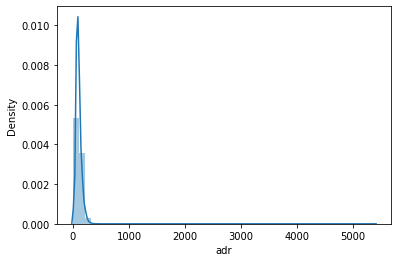

In [32]:
# Distribution of ADR(histogram)
sn.distplot(df['adr'])

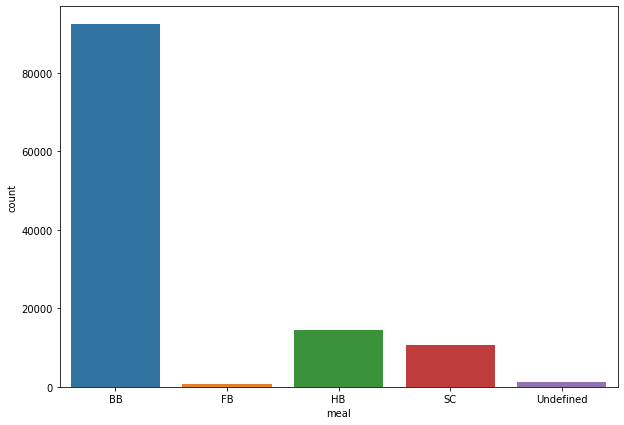

In [34]:
# for the understading of containe
#df['meal'].unique()
plt.figure(figsize=(10,7))
sn.countplot(data=df,x='meal')


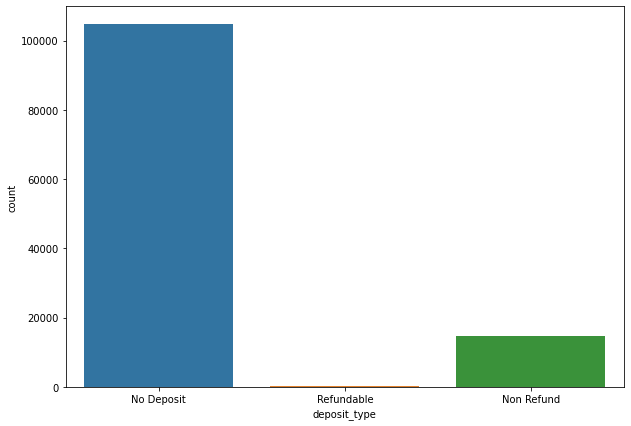

In [37]:
# for the understading of data features
#df['deposit_type'].unique()
plt.figure(figsize=(10,7))
sn.countplot(data=df,x='deposit_type')

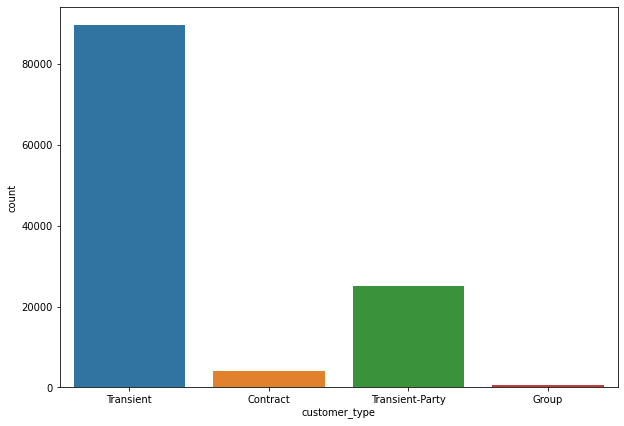

In [38]:
# for the understading of data features
#df['customer_type'].unique()
plt.figure(figsize=(10,7))
sn.countplot(data=df,x='customer_type')

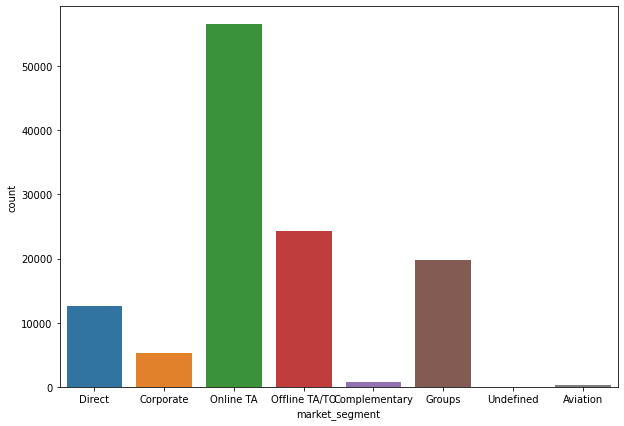

In [39]:
# for the understading of data features
#df['market_segment'].unique()
plt.figure(figsize=(10,7))
sn.countplot(data=df,x='market_segment')

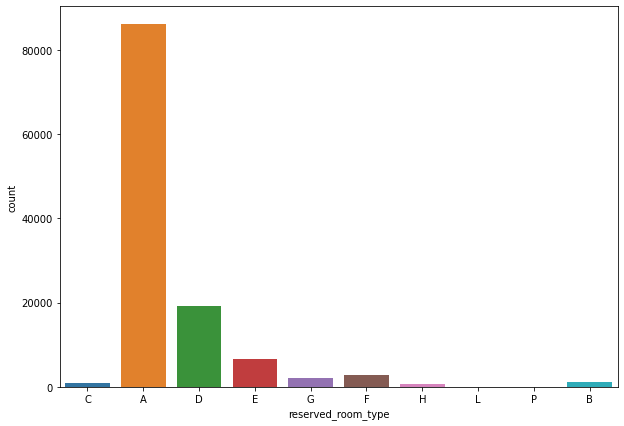

In [40]:
# for the understading of data features
#df['reserved_room_type'].unique()
plt.figure(figsize=(10,7))
sn.countplot(data=df,x='reserved_room_type')

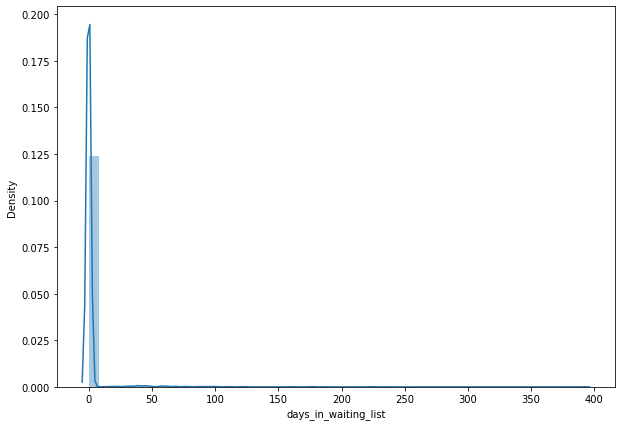

In [42]:
# for the understading of data features
plt.figure(figsize=(10,7))
sn.distplot(df['days_in_waiting_list'])

[Text(0.5, 1.0, 'Total Passengers of both hotels canceled booking propotion')]

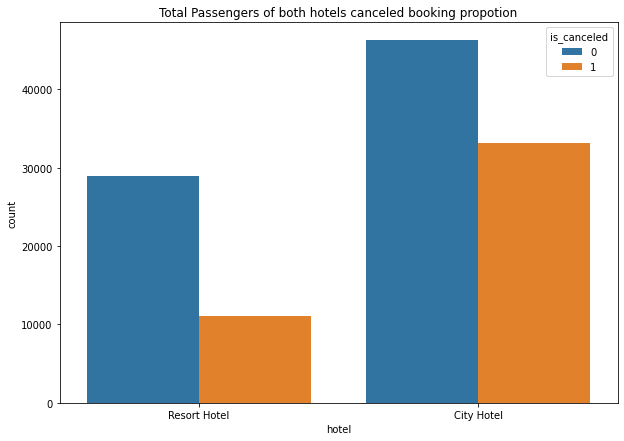

In [43]:
# hotels propotion in resort hotel & city hotel basis on canceled booking(0=not cancel, 1= cancel)
# More passengers made cancellations at city hotels.
plt.figure(figsize=(10,7))
canceled_booking=sn.countplot(data=df,x='hotel',hue='is_canceled')
canceled_booking.set(title = "Total Passengers of both hotels canceled booking propotion")

[Text(0.5, 1.0, 'Total Passengers of both hotels per year')]

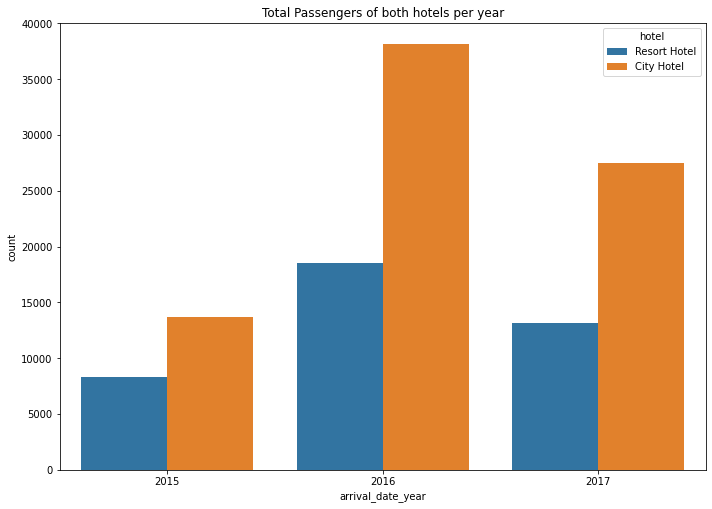

In [44]:
# year wise hotel booking 
plt.figure(figsize=(10,7))
distribution = sn.countplot(df['arrival_date_year'], hue = 'hotel', data = df);
plt.tight_layout()
distribution.set(title = "Total Passengers of both hotels per year")

[Text(0.5, 1.0, 'Total Passengers booking of both hotels per month')]

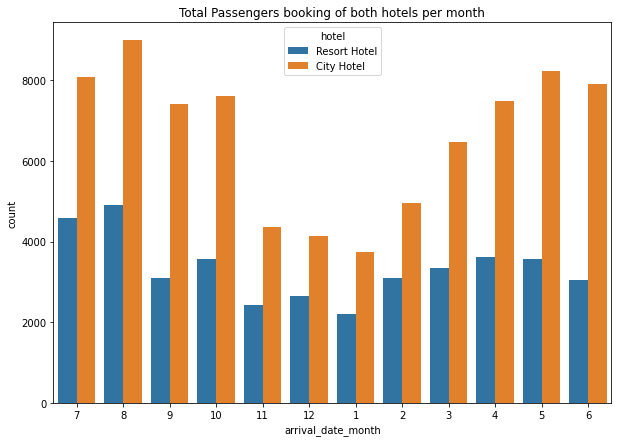

In [45]:
#monthwise hotel booking  for fisrt 12 month
df['arrival_date_month'].replace({'January' : '1','February' : '2','March' : '3','April' : '4','May' : '5','June' : '6','July' : '7','August' : '8','September' : '9', 'October' : '10','November' : '11','December' : '12'}, inplace=True)
plt.figure(figsize=(10,7))
monthwise = sn.countplot(df['arrival_date_month'], hue = 'hotel', data = df);
monthwise.set(title = "Total Passengers booking of both hotels per month")


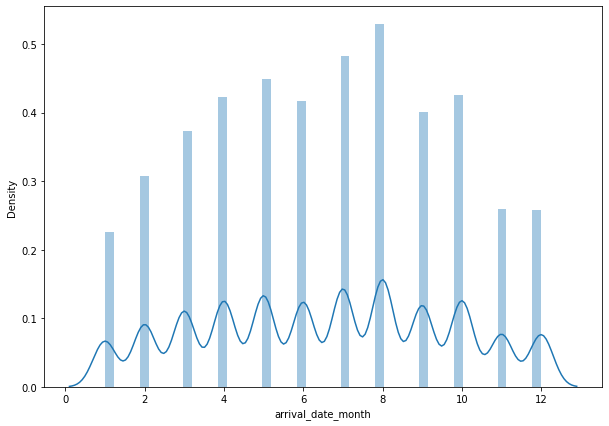

In [46]:
# distribution plot for monthwise booking
plt.figure(figsize=(10,7))
sn.distplot(df['arrival_date_month'])

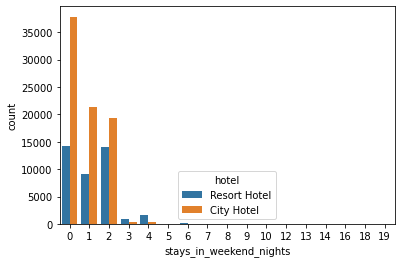

In [ ]:

plt.figure(figsize=(10,7))
sn.countplot(df['stays_in_weekend_nights'],hue='hotel',data=df)

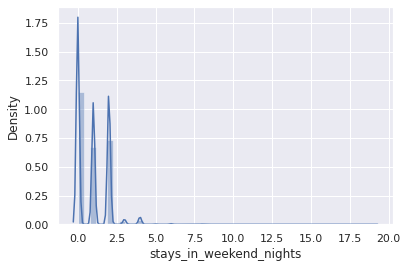

In [ ]:
sn.distplot(df['stays_in_weekend_nights'])

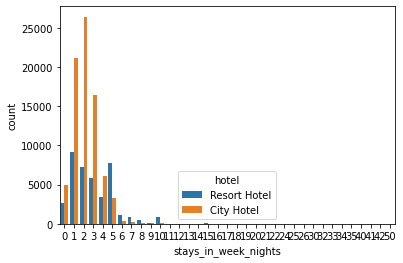

In [ ]:
sn.countplot(df['stays_in_week_nights'],hue='hotel',data=df)

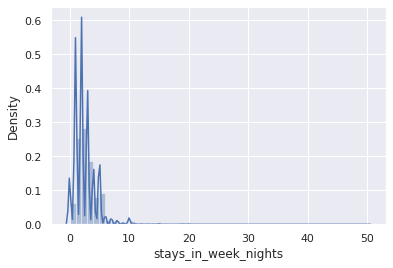

In [ ]:
sn.distplot(df['stays_in_week_nights'])

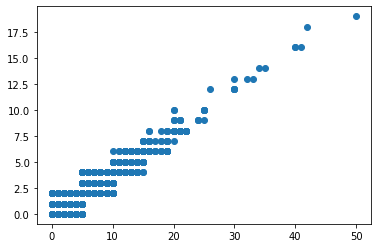

In [ ]:

plt.scatter(df['stays_in_week_nights'], df['stays_in_weekend_nights'])
plt.show()

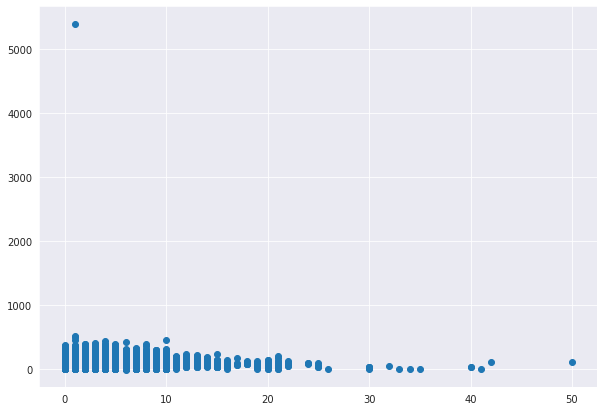

In [ ]:

plt.figure(figsize=(10,7))
plt.scatter(df['stays_in_week_nights'], df['adr'])
plt.show()

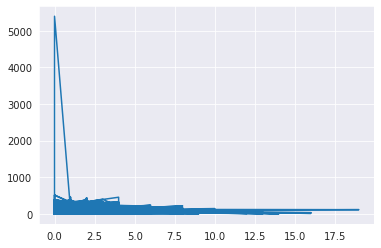

In [ ]:
#plt.figure(figsize=(10,7))
#plt.scatter(df['adr'], df['stays_in_weekend_nights'])
#plt.show()
plt.plot(df['stays_in_weekend_nights'],df['adr'])

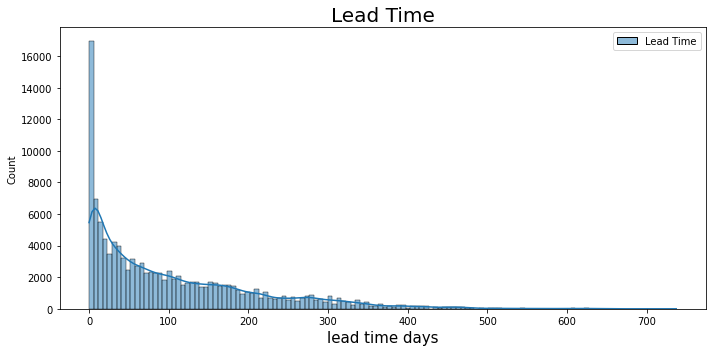

In [ ]:
# cansaltion of hotel booking based on lead time
plt.figure(figsize=(10,5))
#lead_time = data['lead_time']
lead_time = pd.DataFrame(sorted(df['lead_time'], reverse = True), columns = ['Lead Time'])
sn.histplot(lead_time, kde=True)
plt.title("Lead Time", size=20)
plt.xlabel("lead time days", size=15)
plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'Total passengers of both hotels per year based on the cancellation status')]

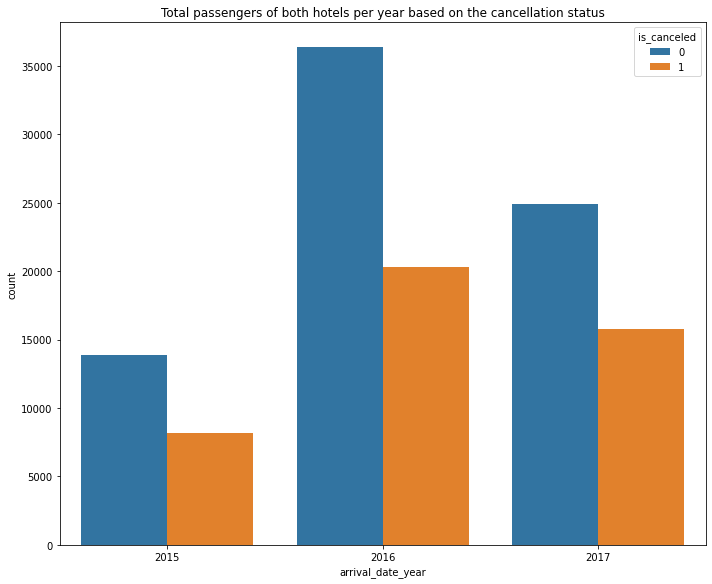

In [ ]:
# Number of hotel booking canceled
plt.figure(figsize=(10,8))
canellation = sn.countplot(df['arrival_date_year'], hue = 'is_canceled', data = df)
plt.tight_layout()
canellation.set(title = "Total passengers of both hotels per year based on the cancellation status")

[Text(0.5, 0, 'Reservation_status'),
 Text(0.5, 1.0, 'Guest with special requests')]

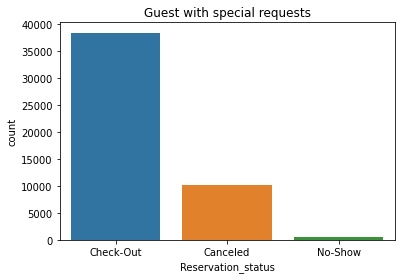

In [ ]:
#Cancelation: Number of Cancellations based on with/without special requests
# Special and non Special Request of the guest
special_req = df[df.total_of_special_requests != 0].copy()
# Plots
spec = sn.countplot(special_req.reservation_status, data=df)
spec.set(title = 'Guest with special requests', xlabel = 'Reservation_status')

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Reservation_status'),
 Text(0.5, 1.0, 'Guest without special requests')]

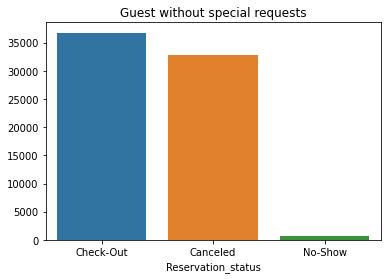

In [ ]:
non_special_req = df[df.total_of_special_requests == 0].copy()
n_spec = sn.countplot(non_special_req.reservation_status, data=df)
n_spec.set(title = 'Guest without special requests', ylabel = "", xlabel = 'Reservation_status')

Text(0, 0.5, 'Count')

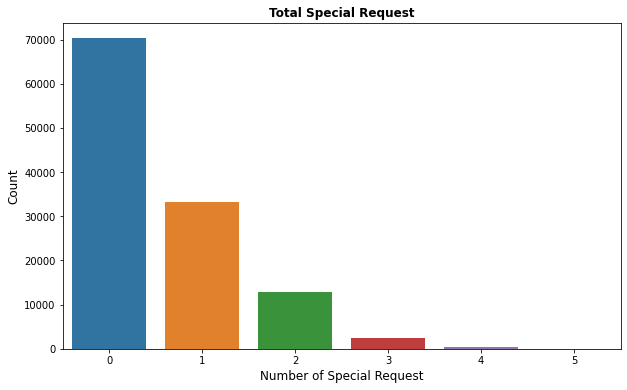

In [ ]:
# `total_of_special_requests` graph

plt.figure(figsize=(10,6))
sn.countplot(x='total_of_special_requests', data=df)
plt.title('Total Special Request', weight='bold')
plt.xlabel('Number of Special Request', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [48]:
#correlation matrix
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.020915,-0.124410,0.086042,-0.073548,0.000149,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,-0.013192,0.010341,-0.119822,0.029218,0.030872,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.010395,-0.030131,0.035501,-0.020904,0.005508,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.018483,-0.087239,-0.012775,-0.042715,0.063281,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.020191,-0.097245,-0.013992,-0.048743,0.096209,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.008283,0.230641,0.014785,0.122884
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,1.000000,-0.008943,-0.007501,-0.006550,0.083440,-0.010621,0.029186,0.037383,0.097889
is_repeated_guest,-0.084793,-0.124410,0.010341,-0.030131,-0.006145,-0.087239,-0.097245,-0.146426,-0.008943,1.000000,0.082293,0.418056,0.012092,-0.022235,-0.134314,0.077090,0.013050


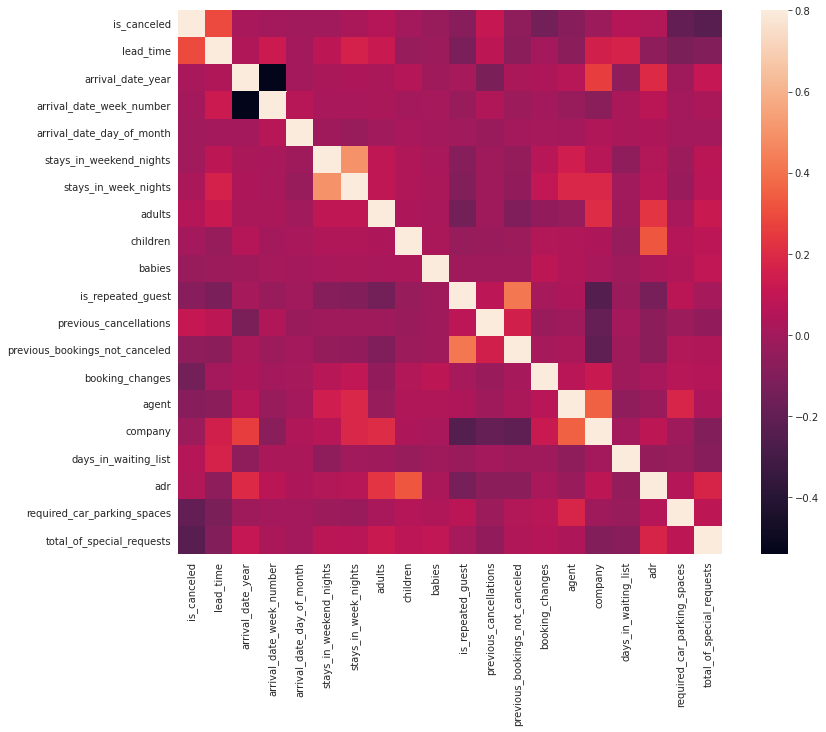

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(14, 10))
sn.heatmap(corrmat, vmax=.8, square=True);

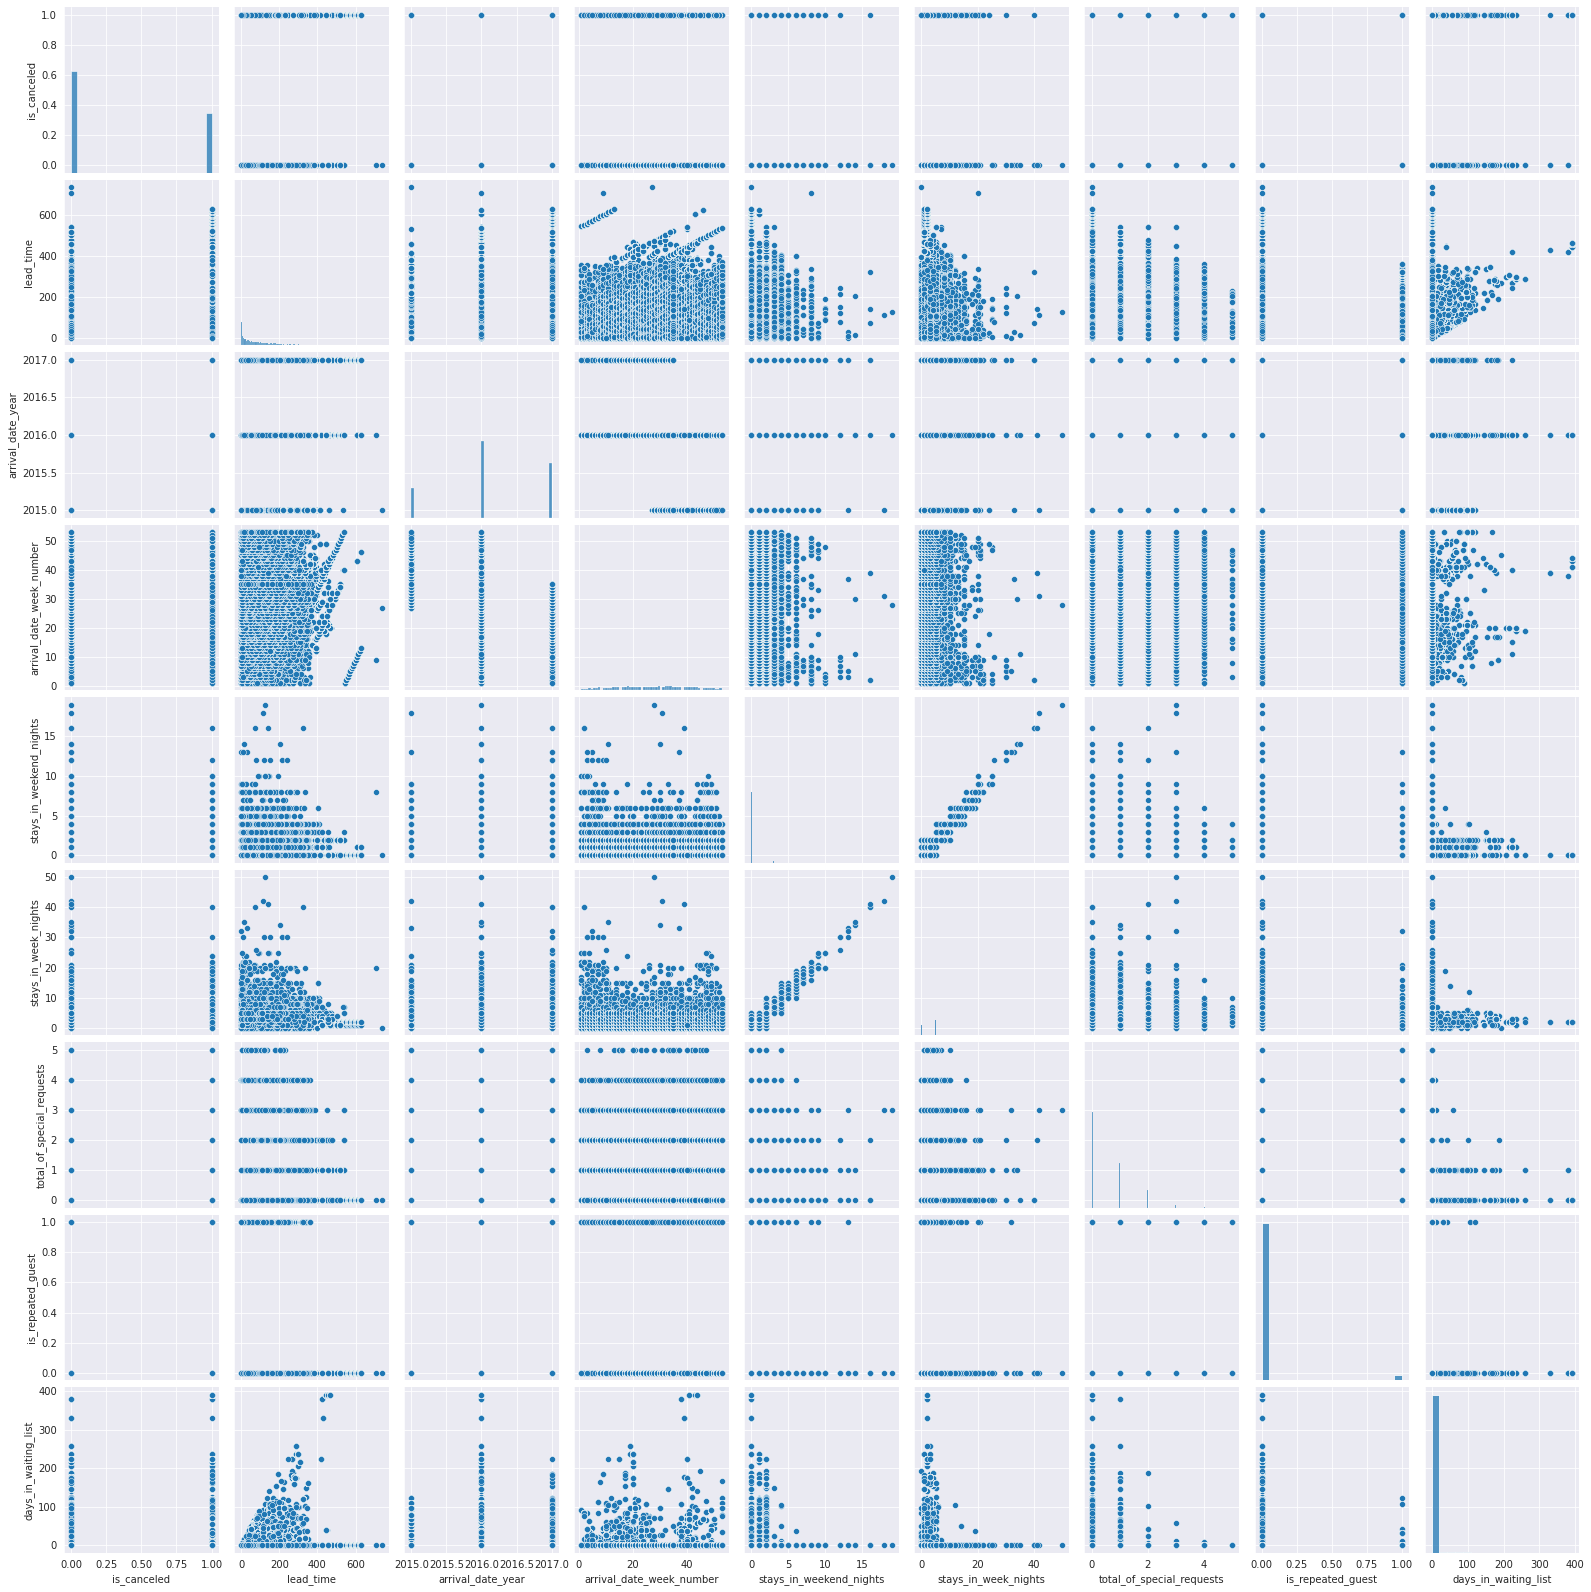

In [ ]:
#sn.set()
cols=['is_canceled','lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number','stays_in_weekend_nights','stays_in_week_nights',
      'country','meal','total_of_special_requests','is_repeated_guest','days_in_waiting_list','customer_type','assigned_room_type']
#sn.pairplot(df[cols],height=5)
sn.set_style(style='darkgrid')
sn.pairplot(df[cols])

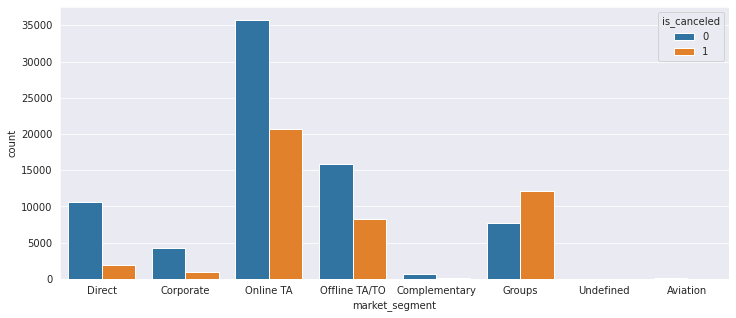

In [ ]:
# number of booking canceled based on market_segment 
plt.figure(figsize=(12,5))
sn.countplot(x='market_segment', hue='is_canceled', data=df)

[Text(0.5, 1.0, 'Cancellation based on Meal Booked')]

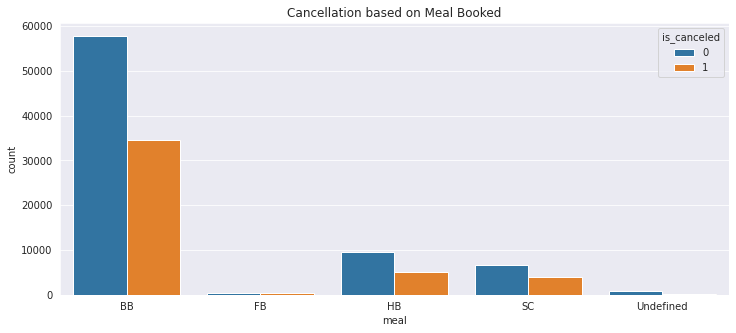

In [ ]:
# Parameters
plt.figure(figsize=(12,5))

meal_canceled = sn.countplot(df['meal'], hue = 'is_canceled', data = df);
meal_canceled.set(title = "Cancellation based on Meal Booked")

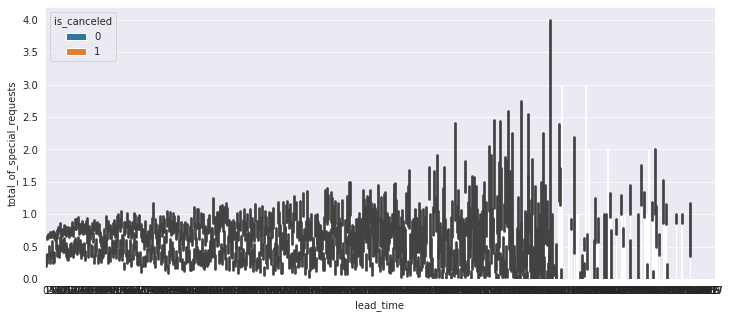

In [ ]:
plt.figure(figsize=(12,5))
sn.barplot(x='lead_time', y='total_of_special_requests', hue='is_canceled',data=df)

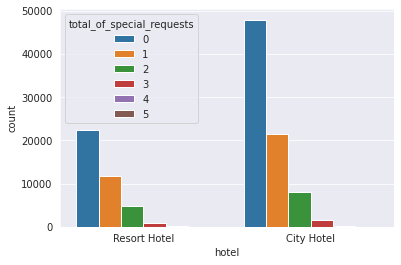

In [ ]:
sn.countplot(df['hotel'], hue='total_of_special_requests',data=df)

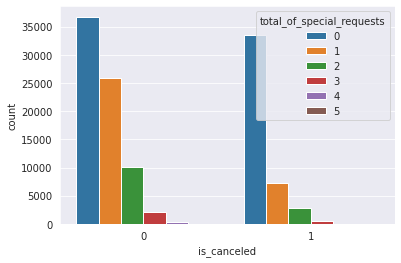

In [ ]:
sn.countplot(df['is_canceled'],hue='total_of_special_requests',data=df)

Text(0, 0.5, 'Count')

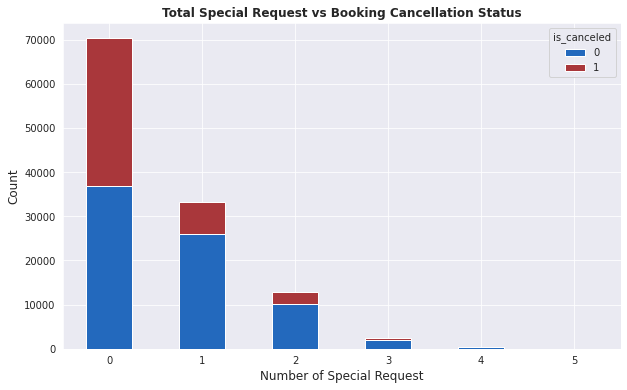

In [ ]:
group_adr_request = df.groupby([ 'total_of_special_requests', 'is_canceled']).size().unstack(fill_value=0)
group_adr_request.plot(kind='bar', stacked=True, cmap='vlag', figsize=(10,6))
plt.title('Total Special Request vs Booking Cancellation Status', weight='bold')
plt.xlabel('Number of Special Request', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

[Text(0.5, 0, 'Reservation_status'),
 Text(0.5, 1.0, 'Guest with special requests')]

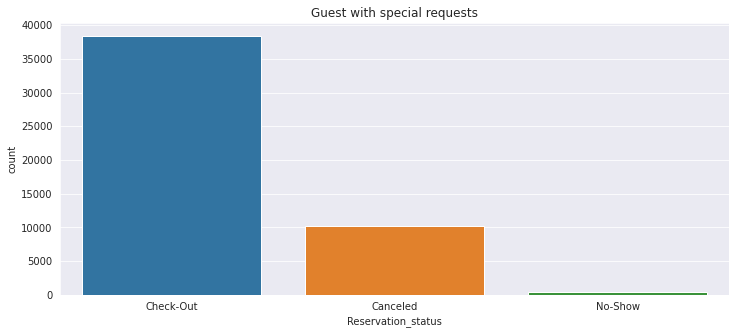

In [ ]:
# cancelation based on special request
plt.figure(figsize=(12,5))
special = df[df.total_of_special_requests != 0].copy()
special_req = sn.countplot(special.reservation_status,)
special_req.set(title = 'Guest with special requests', xlabel = 'Reservation_status')

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Reservation_status'),
 Text(0.5, 1.0, 'Guest without special requests')]

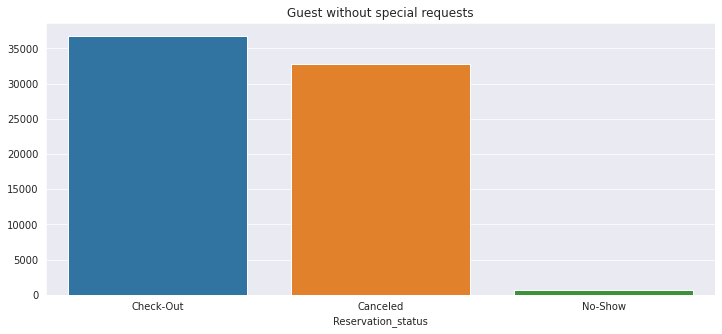

In [ ]:
plt.figure(figsize=(12,5))
non_special = df[df.total_of_special_requests == 0].copy()
non_spec = sn.countplot(non_special.reservation_status)
non_spec.set(title = 'Guest without special requests', ylabel = "", xlabel = 'Reservation_status')

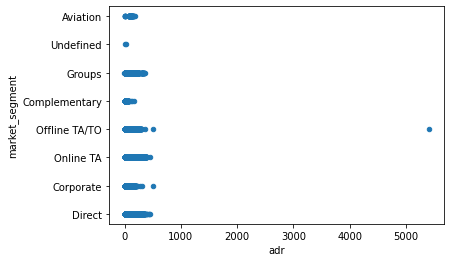

In [13]:
data = pd.concat([df['market_segment'], df['adr']], axis=1)
data.plot.scatter(x="adr", y='market_segment');

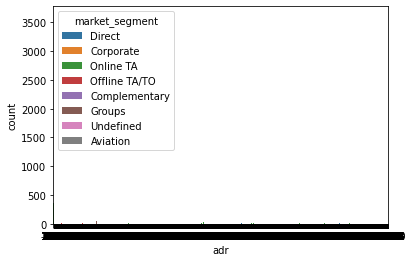

In [14]:
sn.countplot(df['adr'], hue='market_segment',data=df)

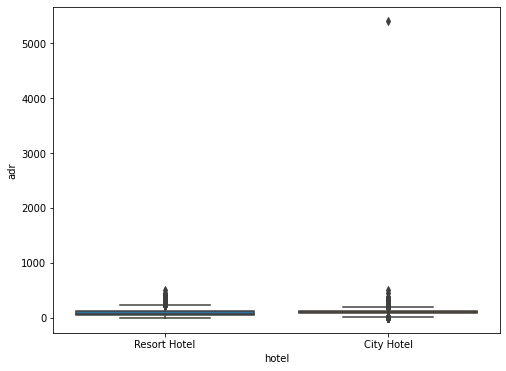

In [47]:
# relationship with categorical features
data = pd.concat([df['hotel'], df['adr']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sn.boxplot(x='hotel', y="adr", data=df)

In [53]:
# droping the row with has adr greater than 3000
df.drop(df[df['adr']>=3000].index, inplace = True)

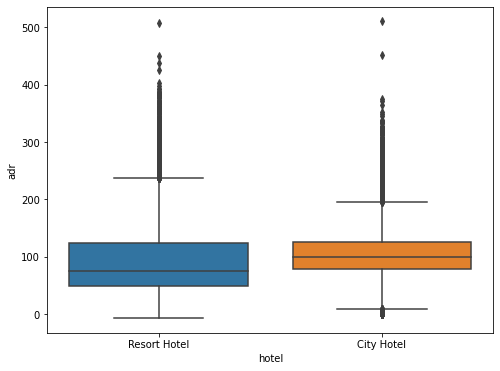

In [54]:
# droped 
data = pd.concat([df['hotel'], df['adr']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sn.boxplot(x='hotel', y="adr", data=df)